In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt      #Importing graph plot library
%matplotlib inline

In [3]:
df=pd.read_csv('housing_train.csv')   #Importing training dataset
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.0,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.0,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,698,GLQ,96,420,1214,GasA,Ex,Y,SBrkr,1214,0,0,1214,1,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1965.0,Unf,2,461,Fa,Fa,Y,0,0,184,0,0,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,Gas

In [4]:
df.drop('Id',axis='columns',inplace=True) #Droping Id column as it has no impact

In [5]:
df.shape

(1168, 80)

In [6]:
pd.set_option("display.max_rows",100)
df.isna().sum()                     #view nan values

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [7]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)                          #For viewing  all categorical elements 
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())        #view all different categorical elements value count
    print()

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

Street
Pave    1164
Grvl       4
Name: Street, dtype: int64

Alley
Grvl    41
Pave    36
Name: Alley, dtype: int64

LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

Utilities
AllPub    1168
Name: Utilities, dtype: int64

LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Ve

Handling Nan value

In [9]:
LotFrontage_mean=df.pivot_table(values="LotFrontage",index="MSZoning")
LotFrontage_mean

,LotFrontage
MSZoning,
C (all),70.777778
FV,57.847826
RH,58.923077
RL,75.445799
RM,53.918919


In [10]:
miss_bool = df['LotFrontage'].isnull()
miss_bool

0        True
1       False
2       False
3       False
4        True
        ...  
1163     True
1164    False
1165    False
1166    False
1167     True
Name: LotFrontage, Length: 1168, dtype: bool

In [11]:
for i, item in enumerate(df['MSZoning']):
    if miss_bool[i]:
        if item in LotFrontage_mean:
            df['LotFrontage'][i] = LotFrontage_mean.loc[item]['LotFrontage']
        else:
            df['LotFrontage'][i] = np.mean(df['LotFrontage'])

In [12]:
df['LotFrontage'].isnull().sum()

0

In [13]:
df['Alley'].replace(np.nan,'No alley access',inplace=True)

In [14]:
df['Alley'].unique()

array(['No alley access', 'Grvl', 'Pave'], dtype=object)

In [15]:
df['Alley'].isna().sum()

0

In [16]:
df['PoolQC'].replace(np.nan,'No Pool',inplace=True)

In [17]:
df['PoolQC'].isna().sum()

0

In [18]:
df['MiscFeature'].replace(np.nan,'None',inplace=True)
df['MiscFeature'].isna().sum()

0

In [19]:
df['Fence'].replace(np.nan,'No Fence',inplace=True)
df['FireplaceQu'].replace(np.nan,'No Fireplace',inplace=True)
df.Fence.isna().sum()
df.FireplaceQu.isna().sum()

0

In [20]:
df['Fence'].replace(np.nan,'No Fence',inplace=True)
df['FireplaceQu'].replace(np.nan,'No Fireplace',inplace=True)

In [21]:
df['BsmtQual'].replace(np.nan,'No Basement',inplace=True)
df['BsmtCond'].replace(np.nan,'No Basement',inplace=True)
df['BsmtExposure'].replace(np.nan,'No Basement',inplace=True)
df['BsmtFinType1'].replace(np.nan,'No Basement',inplace=True)
df['BsmtFinType2'].replace(np.nan,'No Basement',inplace=True)


In [22]:
df['GarageType'].replace(np.nan,'No Garage',inplace=True)
df['GarageFinish'].replace(np.nan,'No Garage',inplace=True)
df['GarageQual'].replace(np.nan,'No Garage',inplace=True)
df['GarageCond'].replace(np.nan,'No Garage',inplace=True)

In [23]:
df['MasVnrType'].replace(np.nan,'None',inplace=True)

In [24]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [25]:
masvnr_mean=df.pivot_table(values="MasVnrArea",index="MasVnrType")
masvnr_mean

,MasVnrArea
MasVnrType,
BrkCmn,212.769231
BrkFace,255.788136
None,1.359195
Stone,250.214286


In [26]:
miss_bool = df['MasVnrArea'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
1163    False
1164    False
1165    False
1166    False
1167    False
Name: MasVnrArea, Length: 1168, dtype: bool

In [27]:
for i, item in enumerate(df['MasVnrType']):
    if miss_bool[i]:
        if item in LotFrontage_mean:
            df['MasVnrArea'][i] = LotFrontage_mean.loc[item]['MasVnrArea']
        else:
            df['MasVnrArea'][i] = np.mean(df['MasVnrArea'])

In [28]:
df['MasVnrType'].isnull().sum()

0

Data Visualization

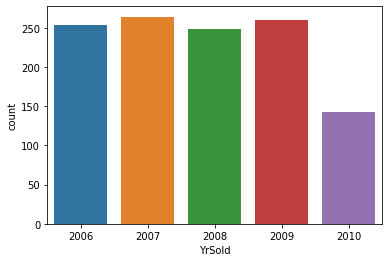

In [29]:
sns.countplot(df['YrSold'])

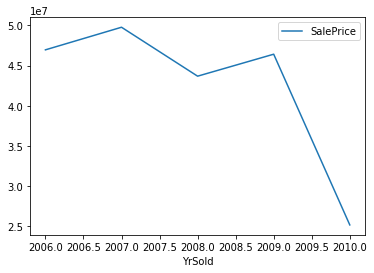

In [30]:
df_year=df[['YrSold','SalePrice']]
df_year.groupby('YrSold').sum().plot(kind='line')

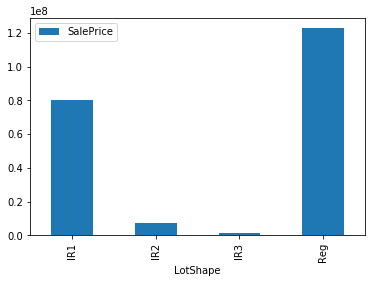

In [31]:
df_shape_type=df[['LotShape','SalePrice']]
df_shape_type.groupby('LotShape').sum().plot(kind='bar')

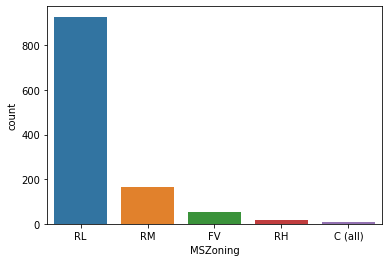

In [32]:
sns.countplot(df['MSZoning'])

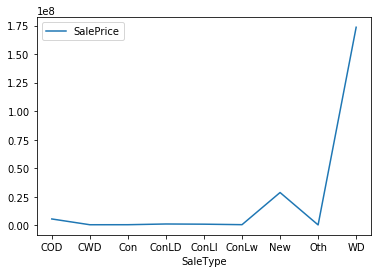

In [33]:
df_sales_type=df[['SaleType','SalePrice']]
df_sales_type.groupby('SaleType').sum().plot(kind='line')

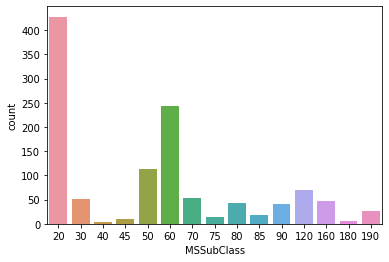

In [34]:
sns.countplot(df['MSSubClass'])                 

In [35]:
df.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,No Pool,No Fence,None,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,No alley access,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,No Pool,No Fence,None,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,No Pool,No Fence,None,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,No Pool,MnPrv,None,0,1,2010,COD,Normal,190000


In [36]:
num_data=df.select_dtypes(include=['int64','float64']).columns.tolist()
num_data

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [37]:
car_data=df.select_dtypes(include=['object']).columns.tolist()
car_data

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [38]:
len(car_data)+len(num_data)

80

In [39]:
corr=df[num_data].corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.336681,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027813,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,0.074640,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.336681,1.000000,0.299452,0.229218,-0.047573,0.112655,0.088799,0.188758,0.228996,0.002159,0.113924,0.356107,0.403436,0.089675,0.007506,0.374251,0.094046,0.001389,0.171773,0.047816,0.237199,-0.002729,0.318771,0.230610,0.054216,0.260252,0.322644,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,0.323779
LotArea,-0.124151,0.299452,1.000000,0.107188,0.017513,0.005506,0.027228,0.121086,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.036133,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.229218,0.107188,1.000000,-0.083167,0.575800,0.555945,0.407230,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.506869,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.047573,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137475,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.302585,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.112655,0.005506,0.575800,-0.377731,1.000000,0.592829,0.321905,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.779860,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.088799,0.027228,0.555945,0.080669,0.592829,1.000000,0.181385,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.612726,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.027813,0.188758,0.121086,0.407230,-0.137475,0.321905,0.181385,1.000000,0.265735,-0.065707,0.109562,0.365016,0.337143,0.172741,-0.070515,0.386791,0.086444,0.014196,0.267278,0.200190,0.091312,-0.037956,0.278661,0.242510,0.249253,0.342077,0.365280,0.151579,0.130885,-0.101941,0.018720,0.046498,0.013590,-0.027582,0.013363,-0.013462,0.463626
BsmtFinSF1,-0.052236,0.228996,0.221851,0.219643,-0.028810,0.227933,0.114430,0.265735,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.131114,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.002159,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.065707,-0.052145,1.000000,-0.213580,0.098167,0.093442,-0.092049,-0.000577,-0.007484,0.163518,0.093692,-0.060773,-0.023734,-0.005788,-0.034411,-0.033702,0.047945,-0.072192,-0.020806,-0.002051,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


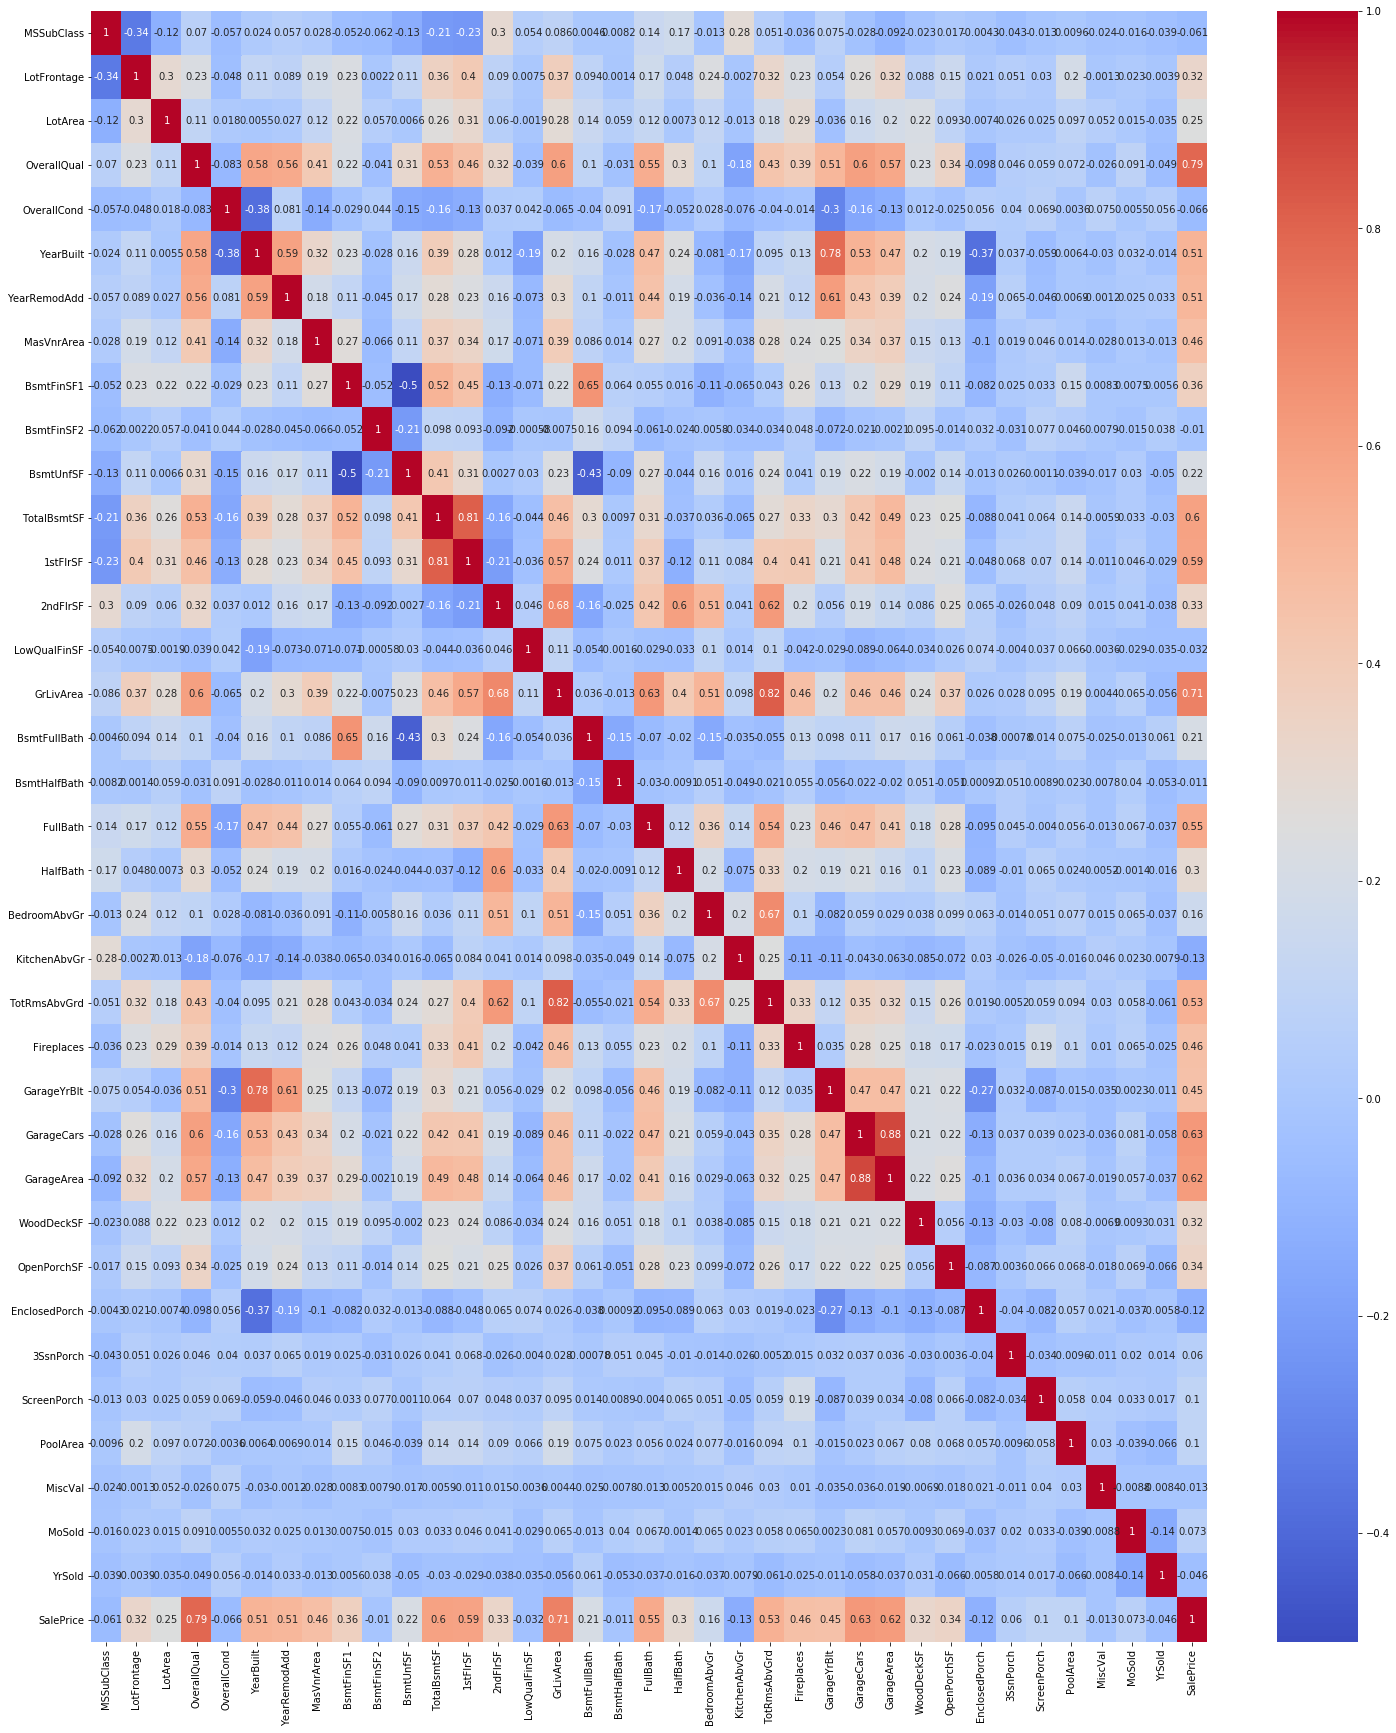

In [40]:
plt.figure(figsize=(25,30))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

Features such as MSSubClass,BsmtFinType2,LowQualFinS,BsmtHalfBath,3SsnPorch,MiscVal,MoSold,YrSold will be removed in future engineering process as it shows very low correlation with output variable.

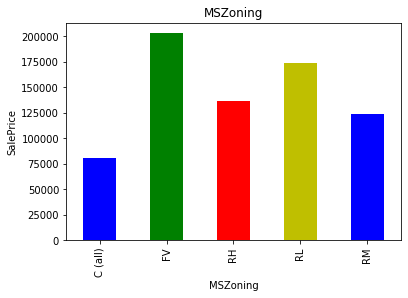

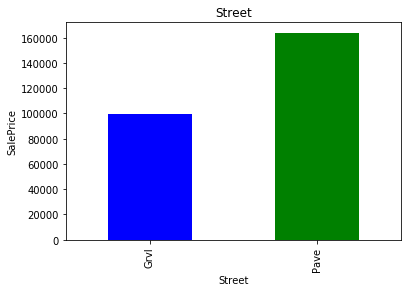

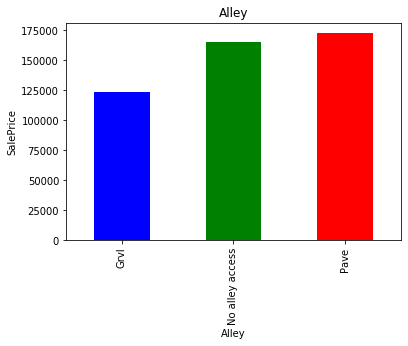

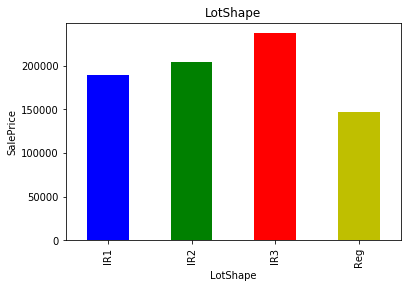

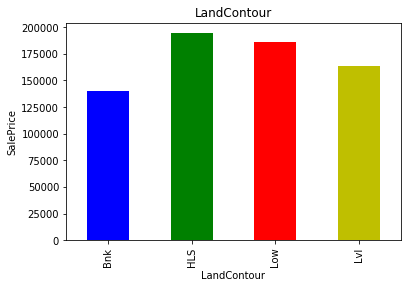

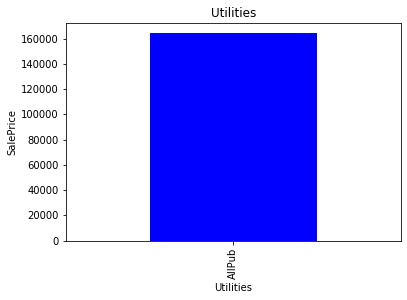

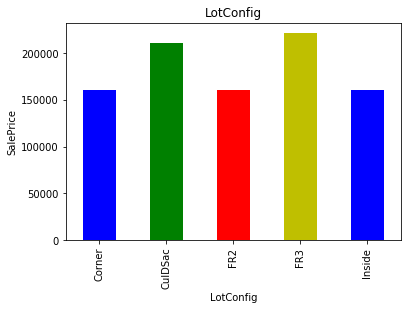

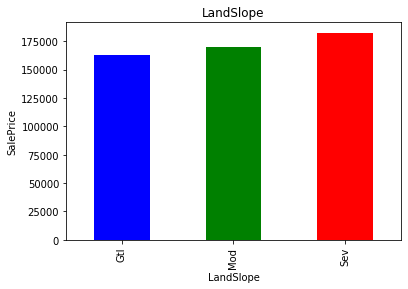

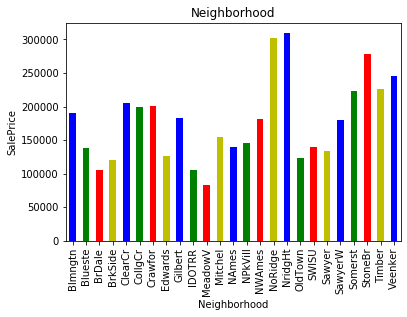

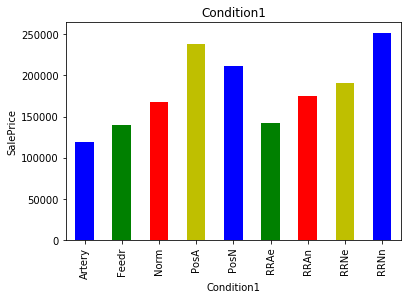

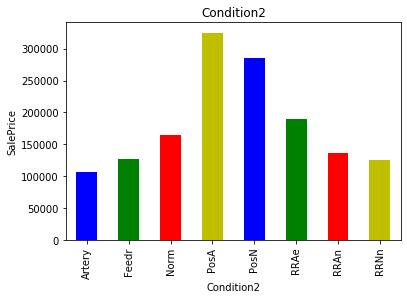

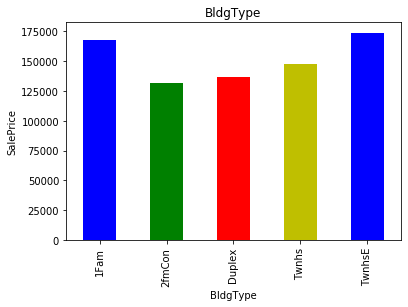

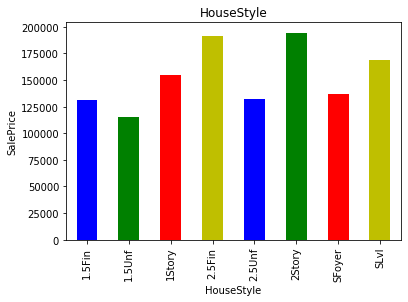

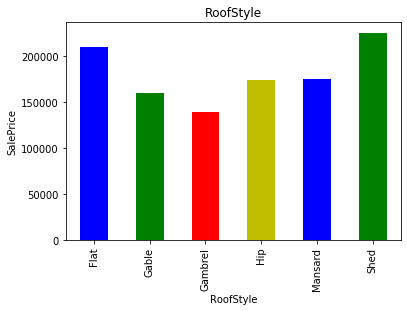

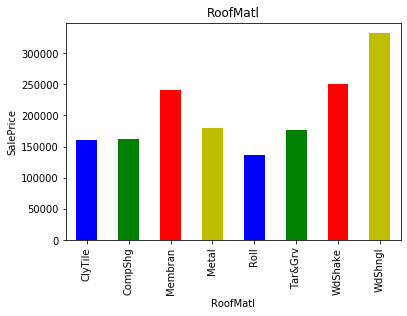

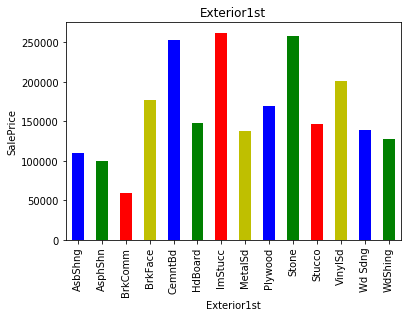

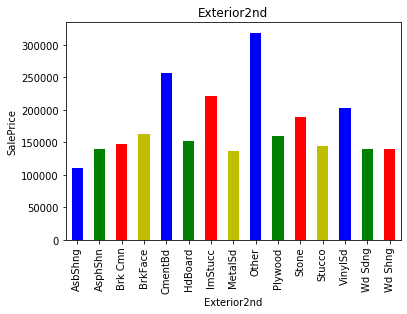

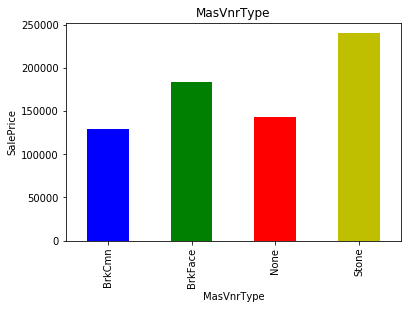

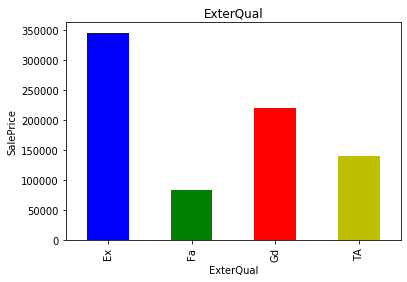

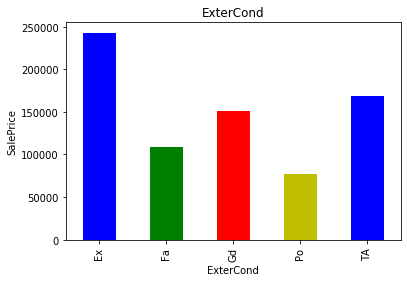

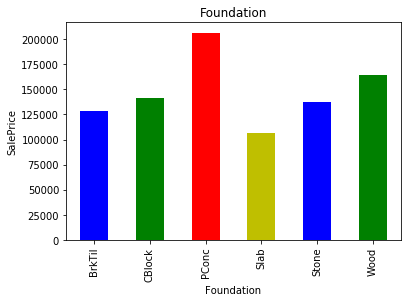

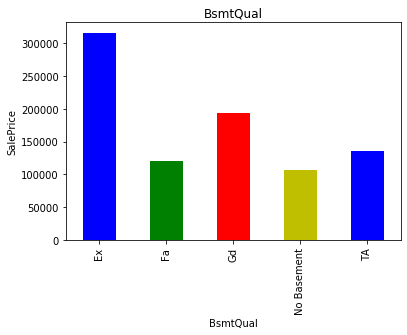

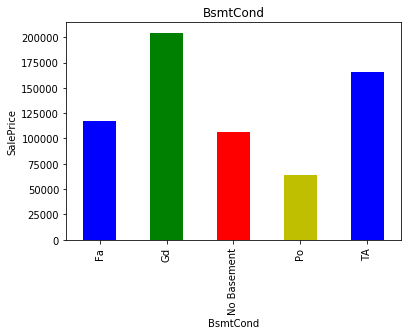

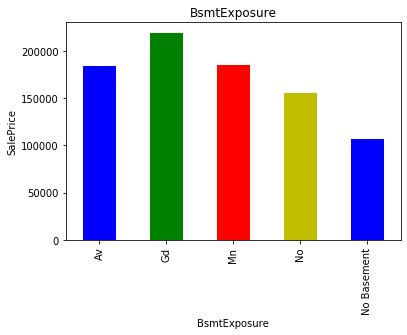

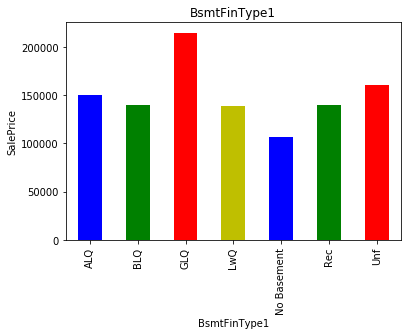

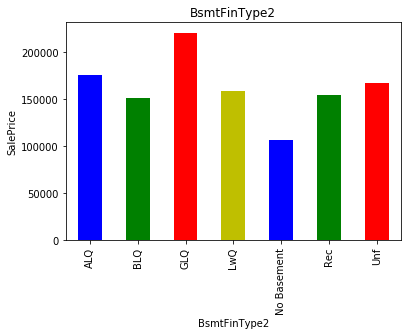

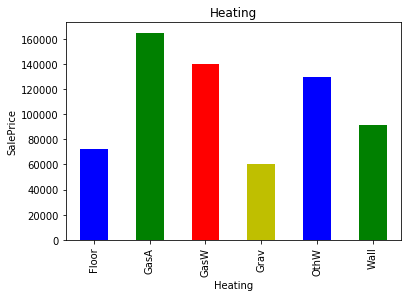

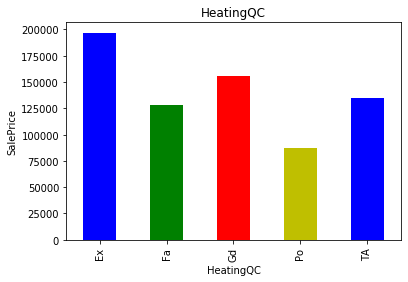

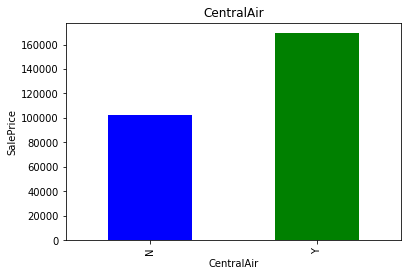

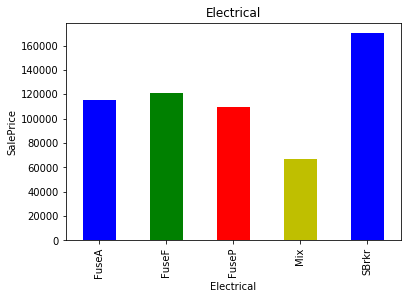

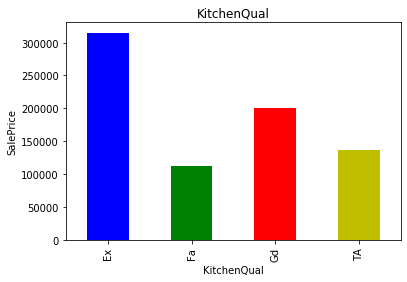

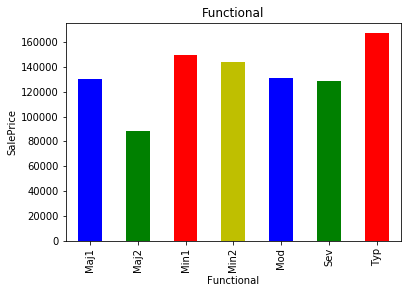

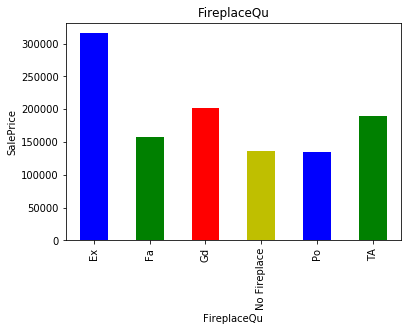

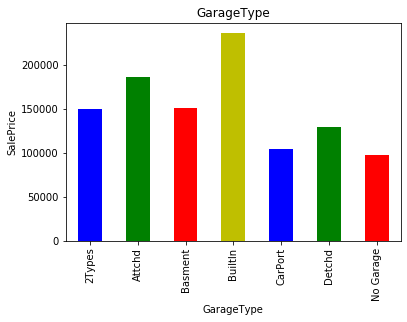

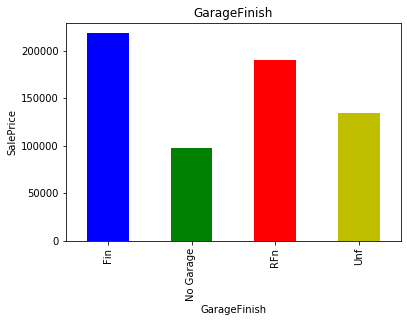

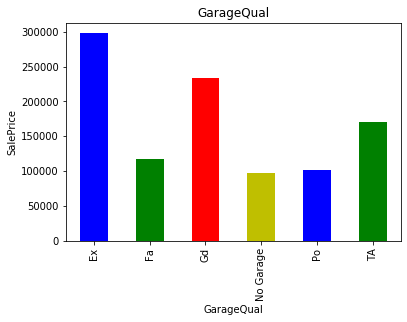

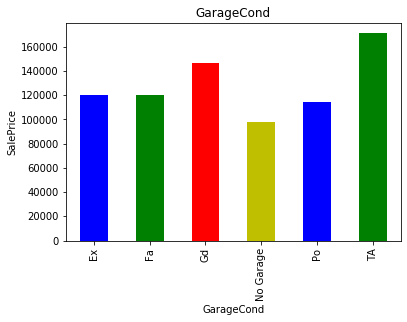

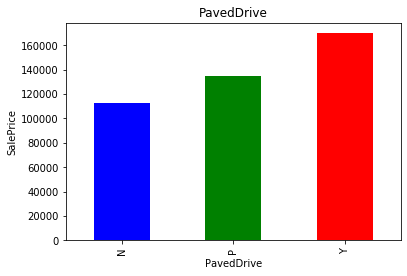

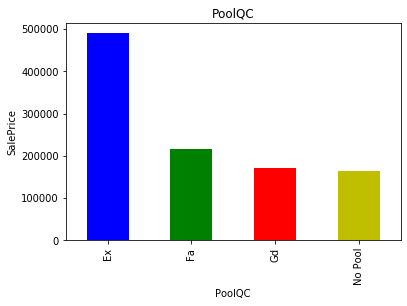

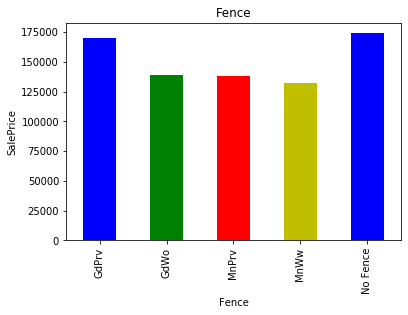

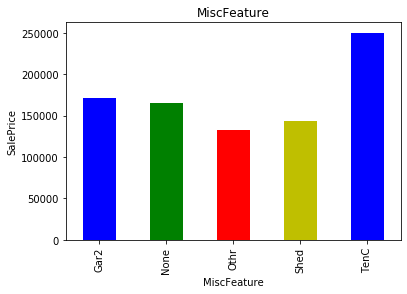

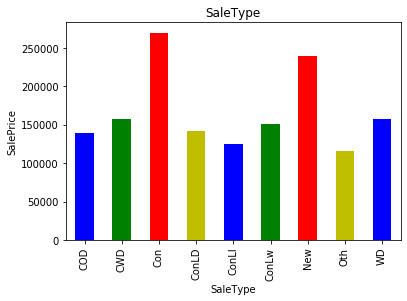

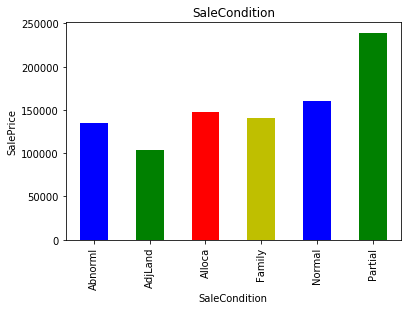

In [41]:
for feature in car_data:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color = ['b','g','r','y'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [42]:
year_col= [feature for feature in num_data if 'Yr' in feature or 'Year' in feature]

In [43]:
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

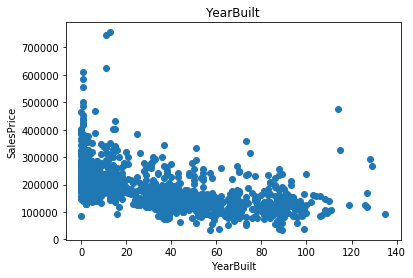

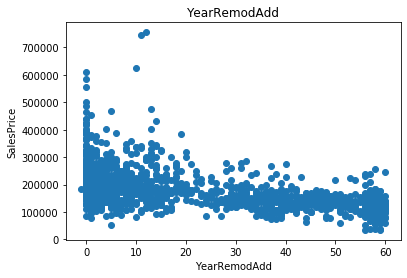

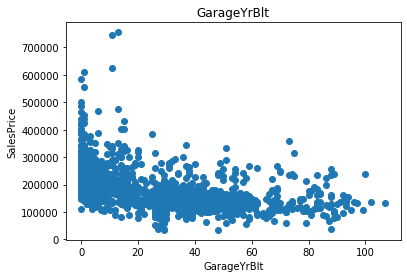

In [44]:
for feature in year_col:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

Seprating continuous and discrete data from numerical data set

In [45]:
continuous_feature=[feature for feature in num_data if len(df[feature].unique())>25 and feature not in year_col]
len(continuous_feature)

16

In [46]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [47]:
discrete_feature=[feature for feature in num_data if len(df[feature].unique())<25 and feature not in year_col]
len(discrete_feature)

17

In [48]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


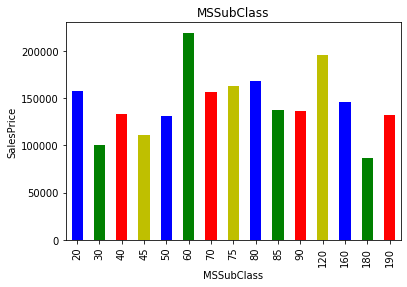

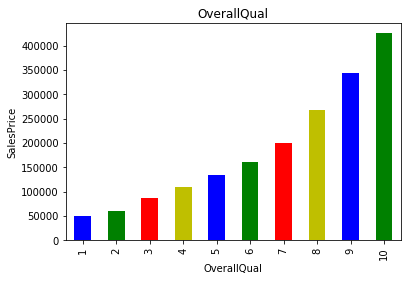

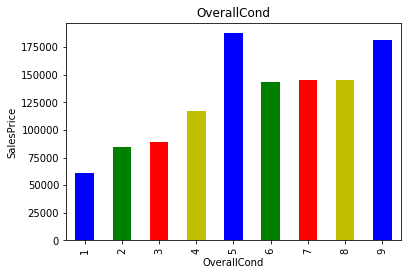

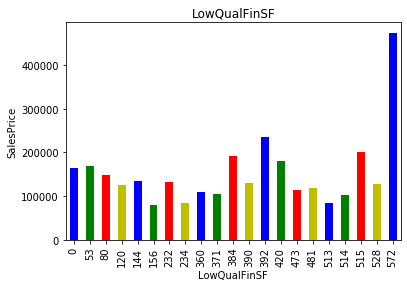

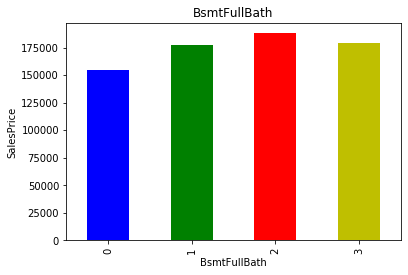

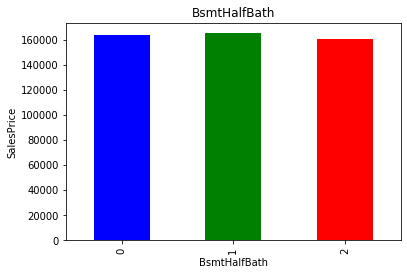

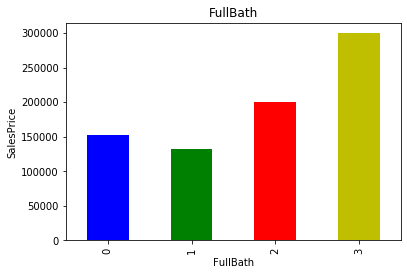

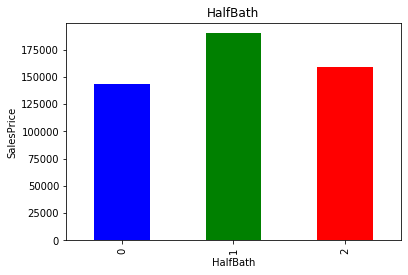

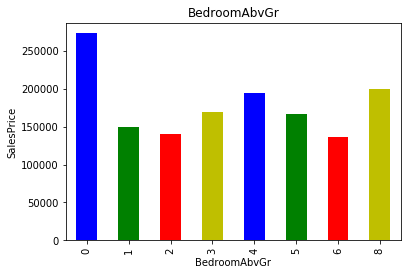

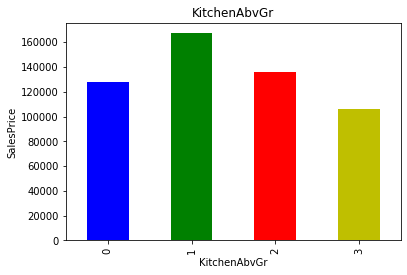

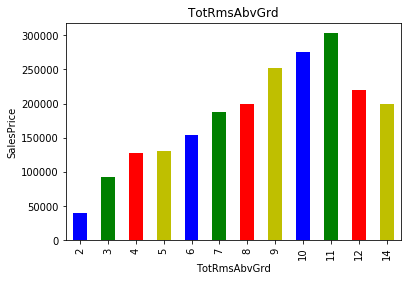

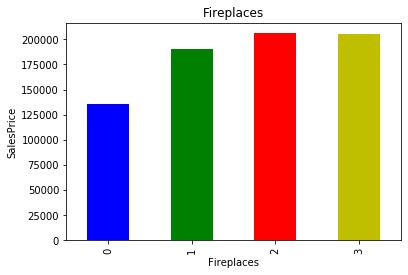

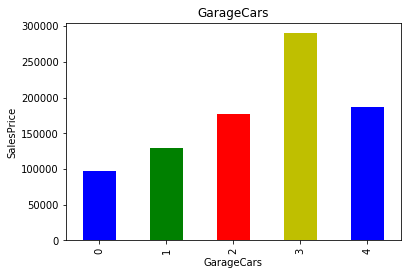

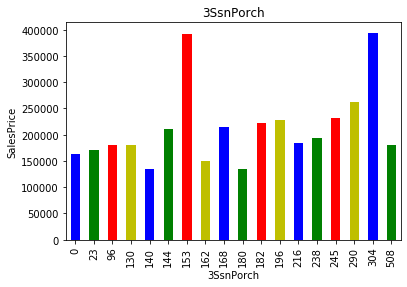

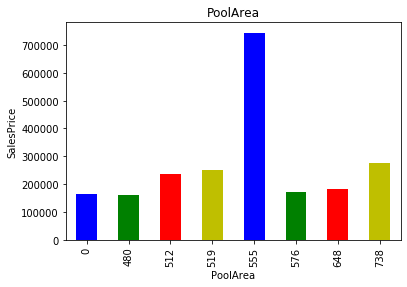

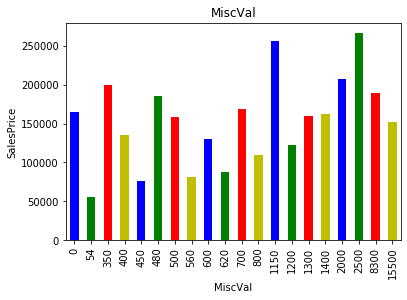

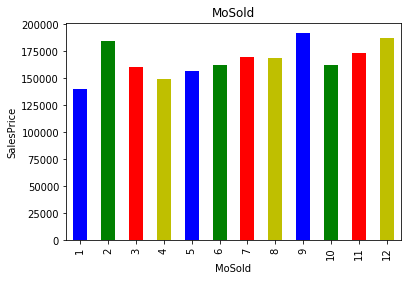

In [49]:
for feature in discrete_feature:                       #plot graph for discrete feature
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color = ['b','g','r','y'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()
    

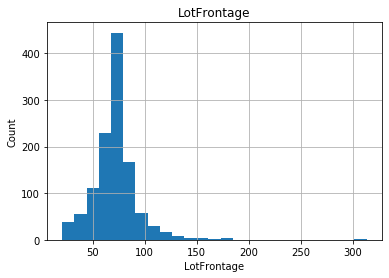

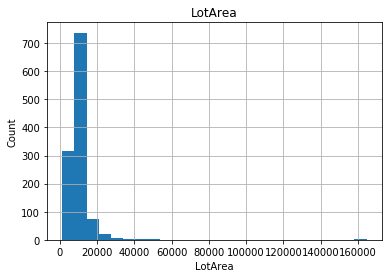

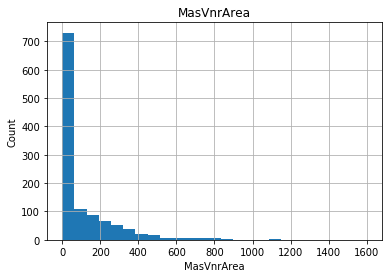

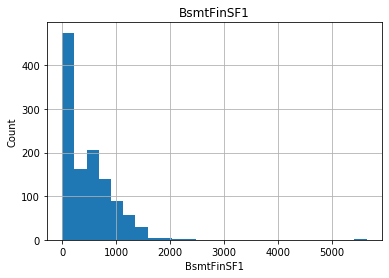

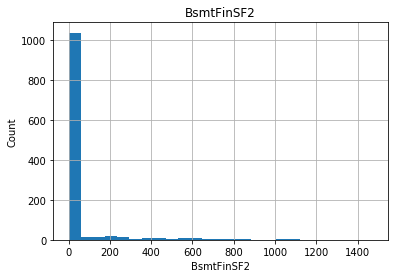

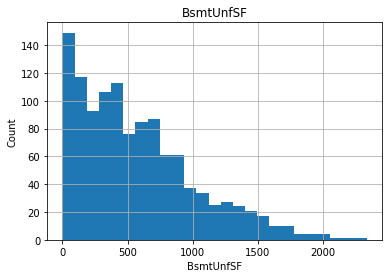

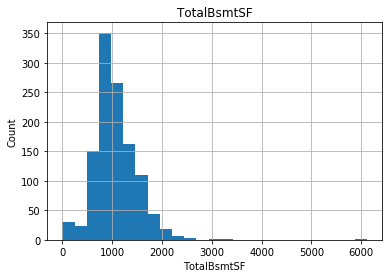

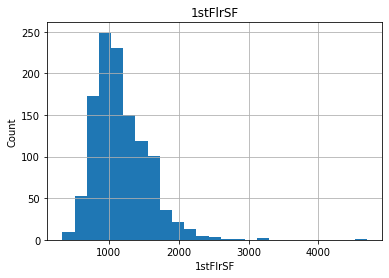

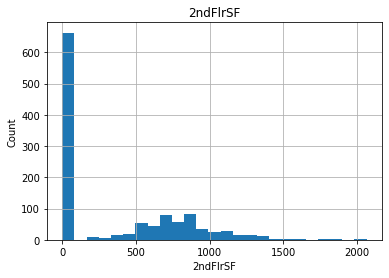

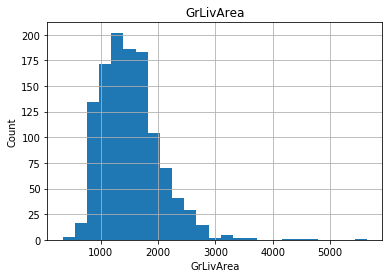

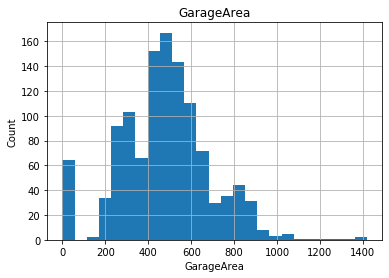

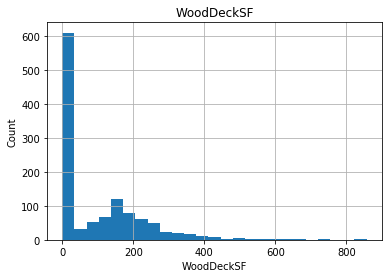

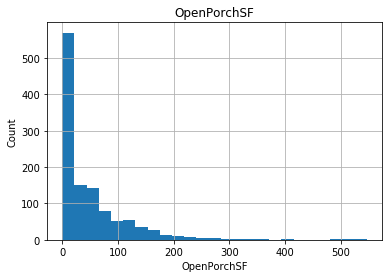

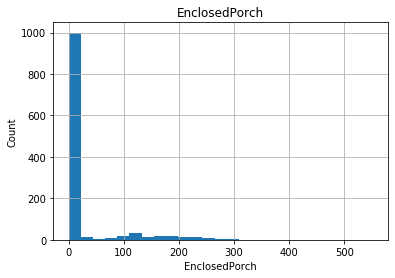

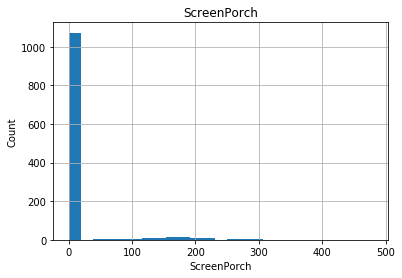

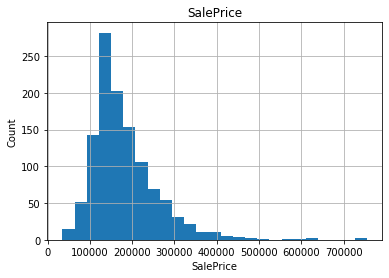

In [50]:
for feature in continuous_feature:                 #plot graph for continuous feature
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [51]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature]=df['YrSold'] - df[feature]

In [52]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()          #Getting number of year built, remodelling and garage year built

,YearBuilt,YearRemodAdd,GarageYrBlt
0,31,31,30.0
1,37,37,37.0
2,11,10,10.0
3,33,33,33.0
4,32,9,32.0


Outlier removal

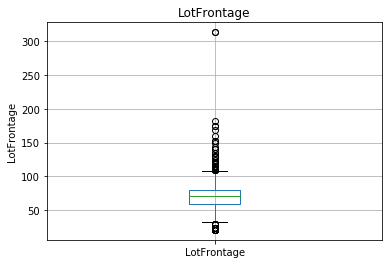

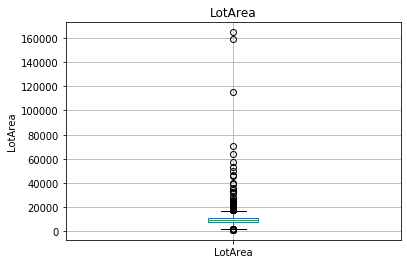

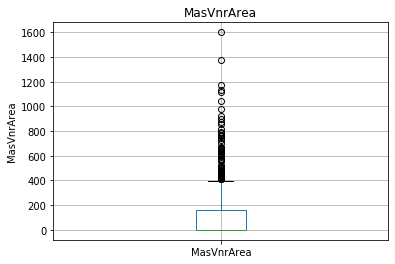

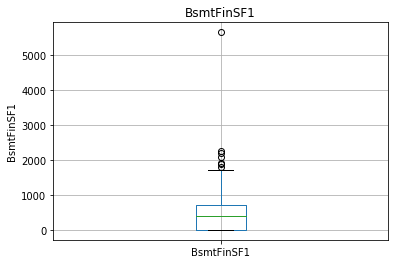

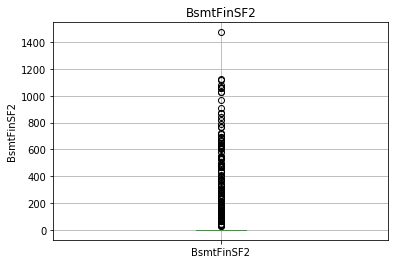

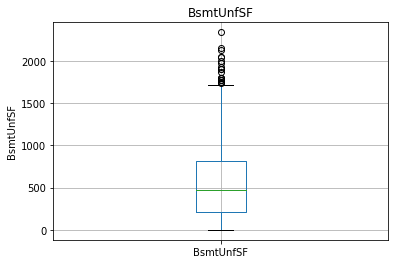

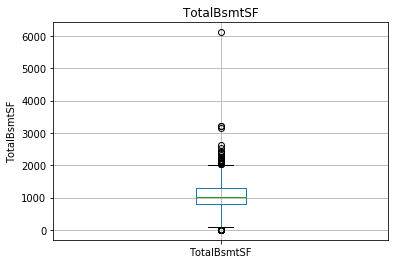

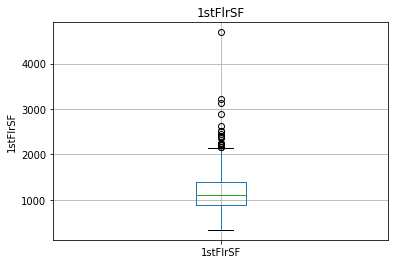

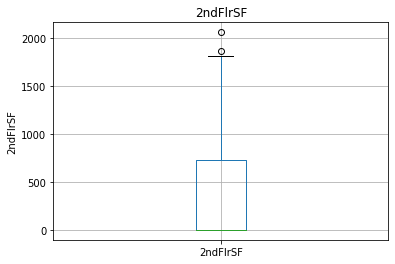

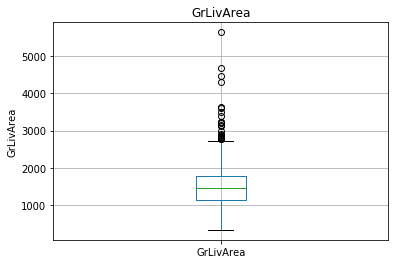

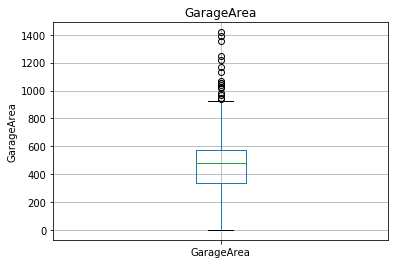

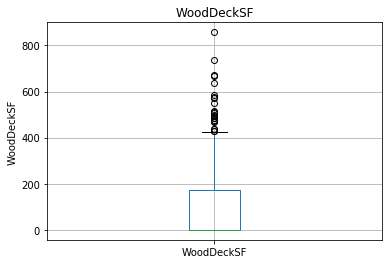

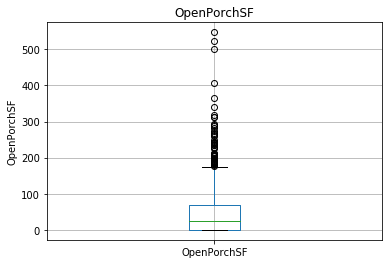

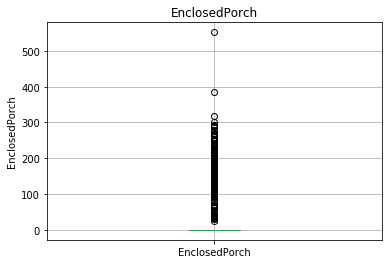

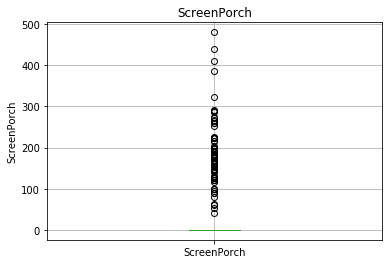

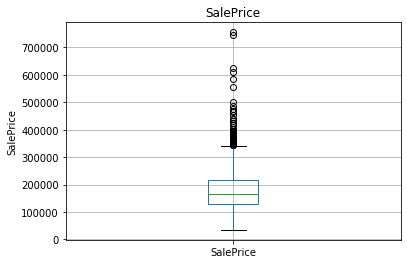

In [53]:
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [54]:
df[continuous_feature].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,70.988470,10484.749144,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,1525.066781,476.860445,96.206336,46.559932,23.015411,15.051370,181477.005993
std,22.437056,8957.442311,182.047152,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,528.042957,214.466769,126.158988,66.381023,63.191089,55.080816,79105.586863
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7621.500000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,1143.250000,338.000000,0.000000,0.000000,0.000000,0.000000,130375.000000
50%,70.988470,9522.500000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,1468.500000,480.000000,0.000000,24.000000,0.000000,0.000000,163995.000000
75%,79.250000,11515.500000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,1795.000000,576.000000,171.000000,70.000000,0.000000,0.000000,215000.000000
max,313.000000,164660.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,755000.000000


In [55]:
df[continuous_feature].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
ScreenPorch       4.105741
SalePrice         1.953878
dtype: float64

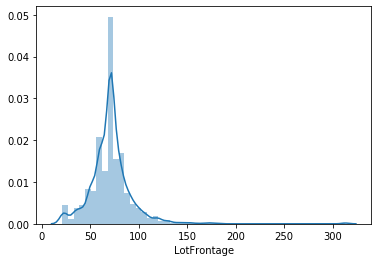

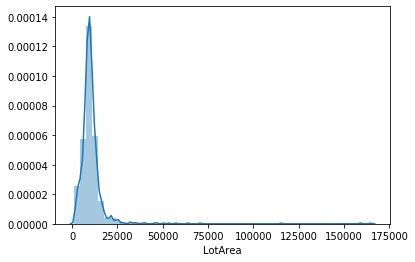

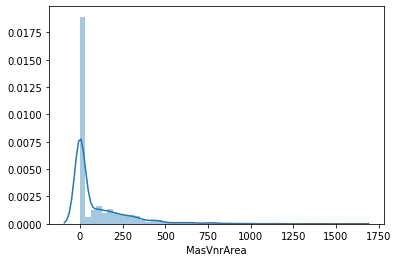

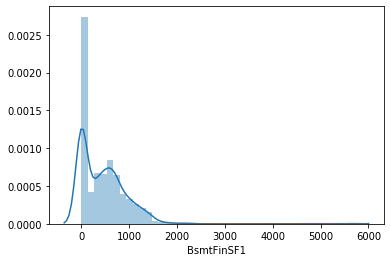

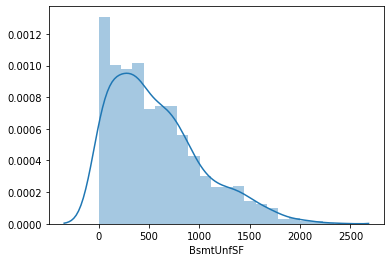

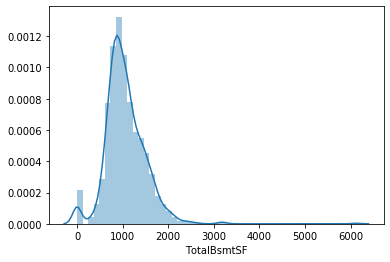

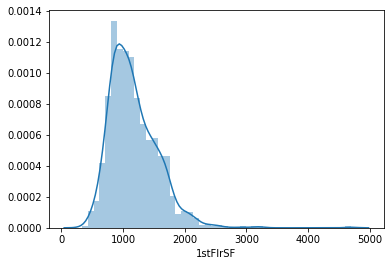

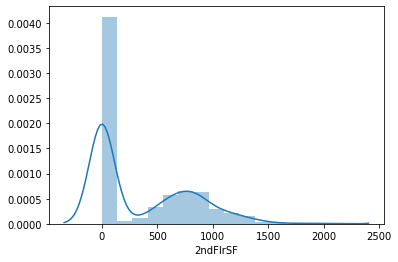

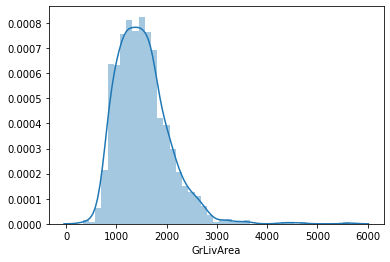

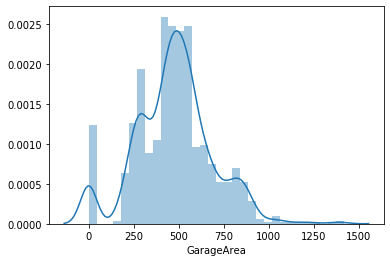

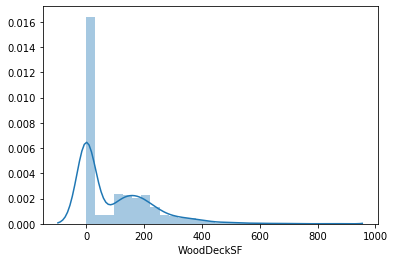

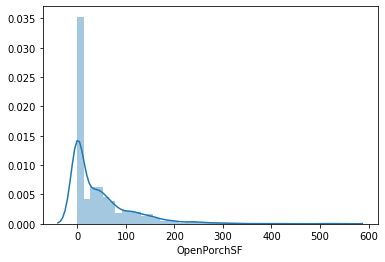

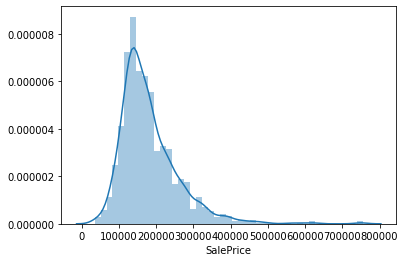

In [56]:
columns=['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [57]:
lower_limit, upper_limit = df.SalePrice.quantile([0.001, 0.999])
lower_limit, upper_limit

(35743.363, 724960.00000001)

In [58]:
df2 = df[(df.SalePrice<upper_limit) & (df.SalePrice>lower_limit)]
df2.shape

(1164, 80)

In [59]:
max_limit = df2.SalePrice.mean() + 3*df2.SalePrice.std()
min_limit = df2.SalePrice.mean() - 3*df2.SalePrice.std()
max_limit, min_limit

(406967.72399053874, -45464.40440290983)

In [60]:
df3 = df2[(df2.SalePrice>min_limit) & (df2.SalePrice<max_limit)]
df3.shape

(1148, 80)

Log Transformation for normal curve for continuous data

In [61]:
import numpy as np
num_features=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

for feature in num_features:
    df3[feature]= np.log1p(df3[feature])

In [62]:
df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,4.276506,8.502891,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.000000,TA,TA,CBlock,Gd,TA,No,ALQ,4.795791,Unf,0,6.865891,6.983790,GasA,TA,Y,SBrkr,6.865891,0.000000,0,6.865891,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,6.089045,TA,TA,Y,0.000000,5.327876,0.0,0,0.0000,0,No Pool,No Fence,None,0,2,2007,WD,Normal,128000
1,20,RL,4.564348,9.671934,Pave,No alley access,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.000000,Gd,Gd,PConc,TA,Gd,Gd,ALQ,5.863631,Rec,823,6.950815,7.704361,GasA,Ex,Y,SBrkr,7.704361,0.000000,0,7.704361,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,6.432940,TA,TA,Y,4.406719,5.337538,0.0,0,5.4161,0,No Pool,No Fence,None,0,10,2007,WD,Normal,268000
2,60,RL,4.532599,9.202409,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,6.760415,Unf,0,5.545177,7.019297,GasA,Ex,Y,SBrkr,7.028201,6.787845,0,7.607878,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,6.122493,TA,TA,Y,5.198497,4.875197,0.0,0,0.0000,0,No Pool,No Fence,None,0,6,2007,WD,Normal,269790
3,20,RL,4.663439,9.371779,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,6.175867,TA,TA,CBlock,Gd,TA,No,BLQ,6.559615,Unf,0,7.038784,7.520235,GasA,Ex,Y,SBrkr,7.520235,0.000000,0,7.520235,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,6.304449,TA,TA,Y,0.000000,4.812184,0.0,0,0.0000,0,No Pool,MnPrv,None,0,1,2010,COD,Normal,190000
4,20,RL,4.276506,9.719324,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,4.844187,Gd,TA,CBlock,Gd,TA,No,ALQ,7.128496,Unf,0,5.877736,7.379632,GasA,Gd,Y,SBrkr,7.379632,0.000000,0,7.379632,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,6.272877,TA,TA,Y,5.484797,0.000000,0.0,0,0.0000,0,No Pool,No Fence,None,0,6,2009,WD,Normal,215000


Encoding Categorical Variable

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in car_data:
    df3[col] = le.fit_transform(df3[col])

In [64]:
df3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,4.276506,8.502891,1,1,0,3,0,4,0,13,2,2,4,2,6,5,31,31,1,1,8,9,2,0.000000,3,4,1,2,4,3,0,4.795791,6,0,6.865891,6.983790,1,4,1,4,6.865891,0.000000,0,6.865891,0,0,2,0,2,1,3,5,6,1,5,1,30.0,2,2,6.089045,5,5,2,0.000000,5.327876,0.000000,0,0.0000,0,3,4,1,0,2,2007,8,4,128000
1,20,3,4.564348,9.671934,1,1,0,3,0,4,1,12,2,2,0,2,8,6,37,37,0,5,12,13,2,0.000000,2,2,2,4,1,1,0,5.863631,5,823,6.950815,7.704361,1,0,1,4,7.704361,0.000000,0,7.704361,1,0,2,0,4,1,2,8,6,1,5,1,37.0,3,2,6.432940,5,5,2,4.406719,5.337538,0.000000,0,5.4161,0,3,4,1,0,10,2007,8,4,268000
2,60,3,4.532599,9.202409,1,1,0,3,0,1,0,15,2,2,0,5,7,5,11,10,1,1,7,7,2,0.000000,2,4,2,2,4,0,2,6.760415,6,0,5.545177,7.019297,1,0,1,4,7.028201,6.787845,0,7.607878,1,0,2,1,3,1,3,8,6,1,5,1,10.0,3,2,6.122493,5,5,2,5.198497,4.875197,0.000000,0,0.0000,0,3,4,1,0,6,2007,8,4,269790
3,20,3,4.663439,9.371779,1,1,0,3,0,4,0,14,2,2,0,2,6,6,33,33,3,1,8,9,1,6.175867,3,4,1,2,4,3,1,6.559615,6,0,7.038784,7.520235,1,0,1,4,7.520235,0.000000,0,7.520235,0,0,2,0,3,1,3,7,6,1,5,1,33.0,2,2,6.304449,5,5,2,0.000000,4.812184,0.000000,0,0.0000,0,3,2,1,0,1,2010,0,4,190000
4,20,3,4.276506,9.719324,1,1,0,3,0,2,0,14,2,2,0,2,6,7,32,9,1,1,4,4,3,4.844187,2,4,1,2,4,3,0,7.128496,6,0,5.877736,7.379632,1,2,1,4,7.379632,0.000000,0,7.379632,0,1,2,0,3,1,2,8,6,1,5,1,32.0,0,2,6.272877,5,5,2,5.484797,0.000000,0.000000,0,0.0000,0,3,4,1,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3,4.276506,9.192176,1,1,0,3,0,4,0,19,2,2,0,2,5,5,43,43,1,1,7,7,1,3.465736,3,2,1,4,4,3,1,6.111467,6,0,6.070738,6.783325,1,4,1,4,6.803505,0.000000,0,6.803505,0,0,1,0,3,1,3,5,6,0,3,5,40.0,3,1,5.638355,5,5,2,0.000000,0.000000,0.000000,0,0.0000,0,3,2,1,0,2,2010,8,4,122000
1164,20,3,4.219508,9.080004,1,1,3,3,0,4,0,7,1,2,0,2,4,5,60,6,1,1,11,12,2,0.000000,3,4,1,3,2,4,4,0.000000,4,0,0.000000,0.000000,1,0,1,4,7.027315,0.000000,0,7.027315,0,0,2,0,2,1,2,5,6,0,3,5,7.0,0,2,6.255750,5,5,0,0.000000,4.574711,0.000000,0,0.0000,0,3,2,1,0,5,2009,8,4,108000
1165,160,3,3.218876,7.732369,1,1,3,3,0,2,0,13,2,2,3,5,6,6,33,33,1,1,8,2,2,0.000000,3,4,1,2,4,3,0,6.340359,6,0,5.669881,6.752270,1,4,1,4,6.752270,6.400257,0,7.284135,0,0,2,1,3,1,3,7,6,1,5,1,33.0,3,2,6.089045,5,5,2,4.477337,0.000000,0.000000,0,0.0000,0,3,4,1,0,7,2009,8,4,148500
1166,70,0,3.931826,9.047939,1,2,3,3,0,4,0,9,1,2,0,5,4,4,88,58,2,1,3,3,2,0.000000,3,1,0,4,4,3,6,0.000000,6,0,6.476972,6.476972,1,4,0,4,6.476972,6.505784,0,7.183871,0,0,1,0,3,1,3,6,6,0,3,5,88.0,3,1,5.525453,5,1,0,0.000000,4.007333,5.153292,0,0.0000,0,3,2,1,0,7,2008,8,4,40000


Standard Scaler

In [65]:
feature_scale=[feature for feature in df3.columns if feature not in ['SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(df3[feature_scale])

array([[0.58823529, 0.75      , 0.4459395 , ..., 0.25      , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.55421801, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.542275  , ..., 0.25      , 1.        ,
        0.8       ],
       ...,
       [0.82352941, 0.75      , 0.04808748, ..., 0.75      , 1.        ,
        0.8       ],
       [0.29411765, 0.        , 0.31628003, ..., 0.5       , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.4459395 , ..., 0.        , 1.        ,
        0.8       ]])

In [66]:
data = pd.concat([df3[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.fit_transform(df3[feature_scale]), columns=feature_scale)],
                    axis=1)

In [67]:
data

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,128000,0.588235,0.75,0.445940,0.275164,1.0,0.5,0.0,1.0,0.0,1.00,0.0,0.541667,0.250,0.285714,1.00,0.285714,0.555556,0.500,0.229630,0.524590,0.2,0.142857,0.615385,0.642857,0.666667,0.000000,1.000000,1.00,0.2,0.50,1.00,0.75,0.000000,0.555163,1.000000,0.000000,0.885165,0.801091,0.2,1.0,1.0,1.0,0.398440,0.000000,0.0,0.372431,0.000000,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.250000,1.0,0.333333,1.0,0.166667,0.280374,0.666667,0.50,0.838976,1.0,1.0,1.0,0.000000,0.844853,0.000000,0.0,0.000000,0.0,1.0,1.0,0.25,0.0,0.090909,0.25,1.0,0.8
1,268000,0.000000,0.75,0.554218,0.516664,1.0,0.5,0.0,1.0,0.0,1.00,0.5,0.500000,0.250,0.285714,0.00,0.285714,0.777778,0.625,0.274074,0.622951,0.0,0.714286,0.923077,0.928571,0.666667,0.000000,0.666667,0.50,0.4,1.00,0.25,0.25,0.000000,0.678777,0.833333,0.558345,0.896113,0.883746,0.2,0.0,1.0,1.0,0.716079,0.000000,0.0,0.669336,0.333333,0.0,0.666667,0.0,0.500,0.333333,0.666667,0.500000,1.0,0.333333,1.0,0.166667,0.345794,1.000000,0.50,0.886360,1.0,1.0,1.0,0.652402,0.846385,0.000000,0.0,0.876978,0.0,1.0,1.0,0.25,0.0,0.818182,0.25,1.0,0.8
2,269790,0.235294,0.75,0.542275,0.419670,1.0,0.5,0.0,1.0,0.0,0.25,0.0,0.625000,0.250,0.285714,0.00,0.714286,0.666667,0.500,0.081481,0.180328,0.2,0.142857,0.538462,0.500000,0.666667,0.000000,0.666667,1.00,0.4,0.50,1.00,0.00,0.333333,0.782589,1.000000,0.000000,0.714896,0.805164,0.2,0.0,1.0,1.0,0.459928,0.904317,0.0,0.635171,0.333333,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.500000,1.0,0.333333,1.0,0.166667,0.093458,1.000000,0.50,0.843585,1.0,1.0,1.0,0.769623,0.773071,0.000000,0.0,0.000000,0.0,1.0,1.0,0.25,0.0,0.454545,0.25,1.0,0.8
3,190000,0.000000,0.75,0.591493,0.454658,1.0,0.5,0.0,1.0,0.0,1.00,0.0,0.583333,0.250,0.285714,0.00,0.285714,0.555556,0.625,0.244444,0.557377,0.6,0.142857,0.615385,0.642857,0.333333,0.837022,1.000000,1.00,0.2,0.50,1.00,0.75,0.166667,0.759344,1.000000,0.000000,0.907455,0.862625,0.2,0.0,1.0,1.0,0.646326,0.000000,0.0,0.604136,0.000000,0.0,0.666667,0.0,0.375,0.333333,1.000000,0.416667,1.0,0.333333,1.0,0.166667,0.308411,0.666667,0.50,0.868656,1.0,1.0,1.0,0.000000,0.763079,0.000000,0.0,0.000000,0.0,1.0,0.5,0.25,0.0,0.000000,1.00,0.0,0.8
4,215000,0.000000,0.75,0.445940,0.526454,1.0,0.5,0.0,1.0,0.0,0.50,0.0,0.583333,0.250,0.285714,0.00,0.285714,0.555556,0.750,0.237037,0.163934,0.2,0.142857,0.307692,0.285714,1.000000,0.656538,0.666667,1.00,0.2,0.50,1.00,0.75,0.000000,0.825198,1.000000,0.000000,0.757770,0.846497,0.2,0.5,1.0,1.0,0.593061,0.000000,0.0,0.554348,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.666667,0.500000,1.0,0.333333,1.0,0.166667,0.299065,0.000000,0.50,0.864306,1.0,1.0,1.0,0.812009,0.000000,0.000000,0.0,0.000000,0.0,1.0,1.0,0.25,0.0,0.454545,0.75,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,122000,0.000000,0.75,0.445940,0.417556,1.0,0.5,0.0,1.0,0.0,1.00,0.0,0.791667,0.250,0.285714,0.00,0.285714,0.444444,0.500,0.318519,0.721311

Drop few features which has very low correalation with output

In [68]:
df_train=data.drop(['MSSubClass','BsmtFinType2','LowQualFinSF','BsmtHalfBath','3SsnPorch','MiscVal','MoSold','YrSold'],axis='columns')

In [69]:
df_train.shape

(1148, 72)

In [70]:
df_train.head(2)

,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,128000,0.75,0.445940,0.275164,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.541667,0.25,0.285714,1.0,0.285714,0.555556,0.500,0.229630,0.524590,0.2,0.142857,0.615385,0.642857,0.666667,0.0,1.000000,1.0,0.2,0.5,1.00,0.75,0.0,0.555163,0.000000,0.885165,0.801091,0.2,1.0,1.0,1.0,0.398440,0.0,0.372431,0.000000,0.666667,0.0,0.25,0.333333,1.000000,0.25,1.0,0.333333,1.0,0.166667,0.280374,0.666667,0.5,0.838976,1.0,1.0,1.0,0.000000,0.844853,0.0,0.000000,0.0,1.0,1.0,0.25,1.0,0.8
1,268000,0.75,0.554218,0.516664,1.0,0.5,0.0,1.0,0.0,1.0,0.5,0.500000,0.25,0.285714,0.0,0.285714,0.777778,0.625,0.274074,0.622951,0.0,0.714286,0.923077,0.928571,0.666667,0.0,0.666667,0.5,0.4,1.0,0.25,0.25,0.0,0.678777,0.558345,0.896113,0.883746,0.2,0.0,1.0,1.0,0.716079,0.0,0.669336,0.333333,0.666667,0.0,0.50,0.333333,0.666667,0.50,1.0,0.333333,1.0,0.166667,0.345794,1.000000,0.5,0.886360,1.0,1.0,1.0,0.652402,0.846385,0.0,0.876978,0.0,1.0,1.0,0.25,1.0,0.8


In [71]:
y_train=df_train[['SalePrice']]                        #Output variable
x_train=df_train.drop(['SalePrice'],axis=1)            #Input Variable

Loading test data set for cleaning

In [72]:
df_test=pd.read_csv('housing_test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [73]:
df_test.drop('Id',axis='columns',inplace=True)
df_test.shape

(292, 79)

In [74]:
pd.set_option("display.max_rows",100)
df_test.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [75]:
LotFrontage_mean=df_test.pivot_table(values="LotFrontage",index="MSZoning")
LotFrontage_mean

,LotFrontage
MSZoning,
C (all),60.000000
FV,66.363636
RL,71.608696
RM,47.862745


In [76]:
miss_bool = df_test['LotFrontage'].isnull()
miss_bool

0      False
1       True
2       True
3      False
4      False
       ...  
287    False
288    False
289     True
290    False
291    False
Name: LotFrontage, Length: 292, dtype: bool

In [77]:
for i, item in enumerate(df_test['MSZoning']):
    if miss_bool[i]:
        if item in LotFrontage_mean:
            df_test['LotFrontage'][i] = LotFrontage_mean.loc[item]['LotFrontage']
        else:
            df_test['LotFrontage'][i] = np.mean(df_test['LotFrontage'])

In [78]:
df_test['Alley'].replace(np.nan,'No alley access',inplace=True)
df_test['PoolQC'].replace(np.nan,'No Pool',inplace=True)
df_test['MiscFeature'].replace(np.nan,'None',inplace=True)
df_test['Fence'].replace(np.nan,'No Fence',inplace=True)
df_test['FireplaceQu'].replace(np.nan,'No Fireplace',inplace=True)
df_test['BsmtQual'].replace(np.nan,'No Basement',inplace=True)
df_test['BsmtCond'].replace(np.nan,'No Basement',inplace=True)
df_test['BsmtExposure'].replace(np.nan,'No Basement',inplace=True)
df_test['BsmtFinType1'].replace(np.nan,'No Basement',inplace=True)
df_test['BsmtFinType2'].replace(np.nan,'No Basement',inplace=True)
df_test['GarageType'].replace(np.nan,'No Garage',inplace=True)
df_test['GarageFinish'].replace(np.nan,'No Garage',inplace=True)
df_test['GarageQual'].replace(np.nan,'No Garage',inplace=True)
df_test['GarageCond'].replace(np.nan,'No Garage',inplace=True)
df_test['MasVnrType'].replace(np.nan,'None',inplace=True)

In [79]:
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(), inplace=True)

In [80]:
masvnr_mean=df_test.pivot_table(values="MasVnrArea",index="MasVnrType")
masvnr_mean

,MasVnrArea
MasVnrType,
BrkCmn,474.500000
BrkFace,271.538462
None,0.000000
Stone,203.666667


In [81]:
miss_bool = df_test['MasVnrArea'].isnull()
miss_bool

0      False
1      False
2      False
3      False
4      False
       ...  
287    False
288    False
289    False
290    False
291    False
Name: MasVnrArea, Length: 292, dtype: bool

In [82]:
for i, item in enumerate(df_test['MasVnrType']):
    if miss_bool[i]:
        if item in LotFrontage_mean:
            df_test['MasVnrArea'][i] = LotFrontage_mean.loc[item]['MasVnrArea']
        else:
            df_test['MasVnrArea'][i] = np.mean(df_test['MasVnrArea'])

In [83]:
pd.set_option("display.max_rows",100)
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [84]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df_test[feature]=df_test['YrSold'] - df_test[feature]     #separating

In [85]:
df_test[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2,1,2.0
1,25,25,25.0
2,8,8,8.0
3,68,59,68.0
4,1,1,1.0


In [86]:
import numpy as np
num_features=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

for feature in num_features:
    df_test[feature]= np.log1p(df_test[feature])

In [87]:
cat_features=[x for x in df_test.columns if df_test[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in df_test.columns:
        i = df_test.columns.get_loc(col)
        df_test.iloc[:,i] = df_test.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [88]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,4.465908,9.558035,1,1,0,1,0,0,0,21,2,0,0,2,9,5,2,1,3,0,9,11,3,5.303305,2,3,2,0,3,1,2,7.130899,6,0,6.513230,7.561642,0,0,1,3,7.561642,0.000000,0,7.561642,1,0,2,0,3,1,2,8,5,1,2,1,2.0,0,3,6.517671,5,5,2,5.187386,3.951244,0.000000,0,0.0,0,0,4,0,0,7,2007,5,2
1,120,2,4.211017,8.668196,1,1,0,3,0,1,0,21,2,0,4,2,8,5,25,25,1,0,5,5,2,0.000000,2,3,1,2,3,0,2,6.944087,6,0,5.220356,7.107425,0,2,1,3,7.215975,0.000000,0,7.215975,1,0,1,0,1,1,2,4,5,1,0,1,25.0,2,2,6.338594,5,5,2,4.158883,0.000000,0.000000,0,0.0,0,0,4,0,0,8,2009,0,0
2,20,2,4.211017,9.379154,1,1,3,3,0,4,0,4,2,0,0,2,8,5,8,8,3,0,9,11,2,0.000000,2,3,2,2,3,0,6,0.000000,6,0,7.469654,7.469654,0,0,1,3,7.489412,0.000000,0,7.489412,0,0,2,0,3,1,0,7,5,1,5,1,8.0,2,2,6.259581,5,5,2,5.313206,5.023881,0.000000,0,0.0,0,0,4,0,0,6,2009,5,2
3,70,2,4.330733,9.392745,1,1,3,0,0,4,0,5,2,0,0,5,7,7,68,59,1,0,6,7,2,0.000000,3,3,1,4,3,3,5,5.620401,6,0,6.063785,6.558198,0,0,1,3,6.758095,6.558198,0,7.355641,0,0,1,1,3,1,1,7,5,1,2,1,68.0,3,1,5.459586,5,5,2,0.000000,0.000000,0.000000,0,0.0,0,0,4,0,0,7,2009,5,2
4,60,2,4.465908,9.588708,1,1,0,3,0,1,0,20,1,0,0,5,6,5,1,1,1,0,9,11,3,4.317488,2,3,2,2,3,2,6,0.000000,6,0,6.796824,6.796824,0,0,1,3,6.796824,6.946976,0,7.567346,0,0,2,1,4,1,2,9,5,1,2,3,1.0,0,3,6.505784,5,5,2,4.615121,2.944439,0.000000,0,0.0,0,0,4,0,0,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,2,4.369448,9.230829,1,1,3,3,0,4,0,20,2,0,0,2,8,5,1,1,1,0,9,11,3,6.150603,3,3,2,2,3,3,2,3.526361,6,0,7.333676,7.355002,0,0,1,3,7.355002,0.000000,0,7.355002,0,0,2,0,3,1,2,6,5,1,2,1,1.0,2,3,6.632002,5,5,2,4.976734,4.605170,0.000000,0,0.0,0,0,4,0,0,10,2008,5,2
288,20,2,4.060443,9.131946,1,1,1,3,0,4,0,4,2,0,0,2,5,5,14,13,1,0,9,11,2,0.000000,3,3,2,2,3,3,2,6.532334,6,0,5.720312,6.898715,0,0,1,3,6.898715,0.000000,0,6.898715,0,1,1,0,3,1,3,5,5,0,3,5,12.0,3,2,6.511745,5,5,2,0.000000,0.000000,0.000000,0,0.0,0,0,4,0,0,2,2008,5,2
289,20,2,4.211017,9.327412,1,1,0,3,0,1,0,11,2,0,0,2,6,7,40,40,1,0,10,12,1,5.198497,3,3,1,4,3,3,0,6.361302,6,0,6.056784,6.912743,0,0,1,3,6.912743,0.000000,0,6.912743,1,0,1,0,2,1,3,5,5,1,5,1,40.0,0,2,6.175867,5,5,2,0.000000,0.000000,0.000000,0,0.0,0,0,4,2,700,3,2010,5,2
290,50,3,3.931826,8.517393,1,1,3,3,0,0,0,2,1,0,0,0,6,7,59,56,1,0,4,4,2,0.000000,3,2,1,4,3,3,0,5.991465,6,0,6.406880,6.912743,0,0,1,3,6.912743,6.493754,0,7.417580,0,0,2,0,3,1,3,7,5,2,2,5,56.0,3,2,6.042633,5,5,2,0.000000,3.218876,3.610918,0,0.0,0,0,4,0,0,10,2006,5,2


In [89]:
feature_scale=[feature for feature in df_test.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(df_test[feature_scale])

array([[0.        , 0.66666667, 0.71375713, ..., 0.25      , 1.        ,
        0.66666667],
       [0.58823529, 0.66666667, 0.58143141, ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.58143141, ..., 0.75      , 1.        ,
        0.66666667],
       ...,
       [0.        , 0.66666667, 0.58143141, ..., 1.        , 1.        ,
        0.66666667],
       [0.17647059, 1.        , 0.43648991, ..., 0.        , 1.        ,
        0.66666667],
       [0.82352941, 1.        , 0.        , ..., 0.        , 1.        ,
        0.66666667]])

In [90]:
data1= pd.DataFrame(scaler.fit_transform(df_test[feature_scale]), columns=feature_scale)

In [91]:
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.666667,0.713757,0.450032,1.0,0.5,0.000000,0.333333,0.0,0.00,0.0,0.913043,0.285714,0.0,0.00,0.285714,0.857143,0.333333,0.014706,0.016667,0.75,0.0,0.818182,0.846154,1.000000,0.764247,0.666667,1.000000,0.4,0.0,1.0,0.25,0.333333,0.953634,1.0,0.0,0.860585,0.940790,0.0,0.000000,1.0,0.75,0.880384,0.000000,0.0,0.691021,0.5,0.0,0.666667,0.0,0.500000,0.0,0.666667,0.555556,1.0,0.5,0.4,0.166667,0.022222,0.000000,0.75,0.936528,1.0,1.0,1.0,0.786960,0.654410,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.545455,0.25,1.0,0.666667
1,0.588235,0.666667,0.581431,0.270212,1.0,0.5,0.000000,1.000000,0.0,0.25,0.0,0.913043,0.285714,0.0,1.00,0.285714,0.714286,0.333333,0.183824,0.416667,0.25,0.0,0.454545,0.384615,0.666667,0.000000,0.666667,1.000000,0.2,0.5,1.0,0.00,0.333333,0.928651,1.0,0.0,0.689759,0.884278,0.0,0.666667,1.0,0.75,0.694831,0.000000,0.0,0.508109,0.5,0.0,0.333333,0.0,0.166667,0.0,0.666667,0.111111,1.0,0.5,0.0,0.166667,0.277778,0.666667,0.50,0.910796,1.0,1.0,1.0,0.630930,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.636364,0.75,0.0,0.000000
2,0.000000,0.666667,0.581431,0.413884,1.0,0.5,1.000000,1.000000,0.0,1.00,0.0,0.173913,0.285714,0.0,0.00,0.285714,0.714286,0.333333,0.058824,0.133333,0.75,0.0,0.818182,0.846154,0.666667,0.000000,0.666667,1.000000,0.4,0.5,1.0,0.00,1.000000,0.000000,1.0,0.0,0.986956,0.929345,0.0,0.000000,1.0,0.75,0.841611,0.000000,0.0,0.652800,0.0,0.0,0.666667,0.0,0.500000,0.0,0.000000,0.444444,1.0,0.5,1.0,0.166667,0.088889,0.666667,0.50,0.899443,1.0,1.0,1.0,0.806048,0.832062,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.454545,0.75,1.0,0.666667
3,0.294118,0.666667,0.643582,0.416630,1.0,0.5,1.000000,0.000000,0.0,1.00,0.0,0.217391,0.285714,0.0,0.00,0.714286,0.571429,0.666667,0.500000,0.983333,0.25,0.0,0.545455,0.538462,0.666667,0.000000,1.000000,1.000000,0.2,1.0,1.0,0.75,0.833333,0.751631,1.0,0.0,0.801200,0.815946,0.0,0.000000,1.0,0.75,0.449041,0.889671,0.0,0.582015,0.0,0.0,0.333333,0.5,0.500000,0.0,0.333333,0.444444,1.0,0.5,0.4,0.166667,0.755556,1.000000,0.25,0.784491,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.545455,0.75,1.0,0.666667
4,0.235294,0.666667,0.713757,0.456231,1.0,0.5,0.000000,1.000000,0.0,0.25,0.0,0.869565,0.142857,0.0,0.00,0.714286,0.428571,0.333333,0.007353,0.016667,0.25,0.0,0.818182,0.846154,1.000000,0.622183,0.666667,1.000000,0.4,0.5,1.0,0.50,1.000000,0.000000,1.0,0.0,0.898055,0.845634,0.0,0.000000,1.0,0.75,0.469831,0.942411,0.0,0.694040,0.0,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.666667,1.0,0.5,0.4,0.500000,0.011111,0.000000,0.75,0.934820,1.0,1.0,1.0,0.700144,0.487662,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.50,1.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.000000,0.666667,0.663680,0.383910,1.0,0.5,1.000000,1.000000,0.0,1.00,0.0,0.869565,0.285714,0.0,0.00,0.285714,0.714286,0.333333,0.007353,0.016667,0.25,0.0,0.818182,0.846154,1.000000,0.886349,1.000000,1.00000

In [92]:
test_df=data1.drop(['MSSubClass','BsmtFinType2','LowQualFinSF','BsmtHalfBath','3SsnPorch','MiscVal','MoSold','YrSold'],axis='columns')

In [93]:
test_df.shape

(292, 71)

Linear Regression Model

In [94]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso

In [115]:
lr=LinearRegression()

In [116]:
reg=lr.fit(x_train,y_train)
reg.score(x_train,y_train)

0.855214177660598

Lasso

In [104]:
from sklearn.model_selection import GridSearchCV

In [113]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]} #Grid Search cv for hyper tuning
folds=5
lasso=Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds)


In [198]:
model_cv.fit(x_train,y_train)
print(model_cv.best_params_) #getting best parameters i.e value of alpha for lasso regression for  regularization

{'alpha': 0.1}


In [117]:
folds=5
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train) #fit the model with train data
ls.score(x_train,y_train)

0.8552179113747884

In [118]:
print(ls.coef_)

[-5.76618160e+02 -1.25190174e+04  6.31182106e+04  3.60954605e+04
  9.33265934e+03  9.00584545e+02  7.15749668e+03  0.00000000e+00
 -4.02213437e+02  1.45388968e+04  6.78281241e+03 -3.68991084e+03
 -3.56673657e+04 -9.79575163e+03 -5.67319195e+03  9.98040556e+04
  3.89277480e+04 -3.50583943e+04 -4.92802969e+03  5.54106679e+03
  1.13502185e+04 -1.50848790e+04  8.73563662e+03  2.93760548e+03
  2.19554562e+03 -2.65333018e+04  2.32162667e+03  1.06063523e+04
 -1.31719770e+04  2.56680010e+03 -5.53144713e+03  3.07425413e+03
  1.84225896e+04  1.91390326e+03 -1.32529460e+02  1.65232361e+03
 -8.74313111e+03 -2.65497489e+03 -3.50072147e+02 -4.97007310e+03
  2.80350985e+04 -3.91487353e+03  1.61379494e+05  2.04124772e+04
  7.80819671e+03  3.35382039e+03 -1.52518640e+04 -5.83361213e+04
 -1.87885582e+04  2.29155189e+04  2.25385254e+04  1.56537505e+04
 -5.99301631e+03  4.89567206e+03  1.19901012e+04 -5.99797041e+03
  6.48422108e+04 -2.40202125e+04 -7.04820954e+03  7.74833624e+03
  4.67059697e+03  5.87844

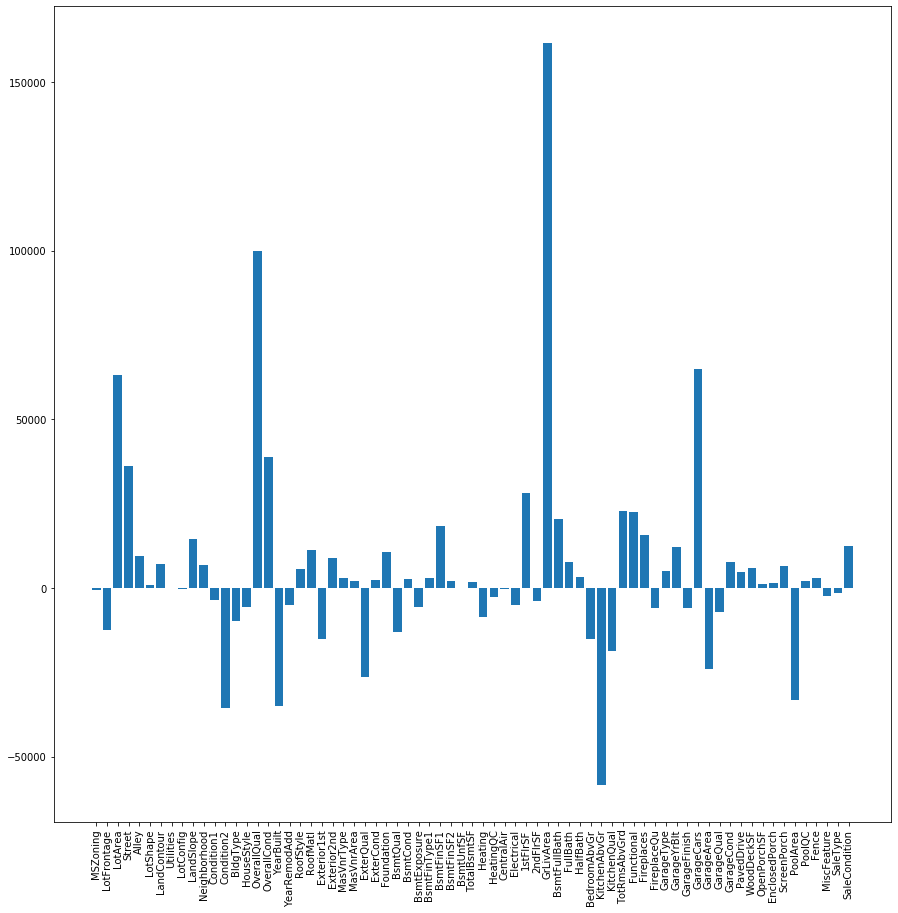

In [119]:
plt.figure(figsize=(15,15))
plt.bar(x_train.columns,ls.coef_)
plt.xticks(rotation=90) 
plt.show()

In [120]:
test=[0.75,0.445940,0.275164,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.541667,0.25,0.285714,1.0,0.285714,0.555556,0.500,0.229630,0.524590,0.2,0.142857,0.615385,0.642857,0.666667,0.0,1.000000,1.0,0.2,0.5,1.00,0.75,0.0,0.555163,0.000000,0.885165,0.801091,0.2,1.0,1.0,1.0,0.398440,0.0,0.372431,0.000000,0.666667,0.0,0.25,0.333333,1.000000,0.25,1.0,0.333333,1.0,0.166667,0.280374,0.666667,0.5,0.838976,1.0,1.0,1.0,0.000000,0.844853,0.0,0.000000,0.0,1.0,1.0,0.25,1.0,0.8]

picked a data above from train data set for testing purpose

In [121]:
test1=np.array(test).reshape(1,71)

In [122]:
ls.predict(test1) #original sales price is 128000

array([124276.89520184])

In [123]:
ls.predict(test_df) #using test data for predicting their final sales price

array([347396.09997073, 231730.00103569, 277967.0643696 , 194538.56014022,
       258598.90279958,  53386.58777625, 140580.72618621, 316499.90723234,
       272668.25918002, 186050.60405858,  -3455.0943153 , 145937.27302304,
       117643.48078771, 206720.7417988 , 310266.71945745, 135893.89237881,
       111201.86121691, 111553.9488184 , 209541.49234355, 250101.60042147,
       209126.3619188 , 164847.12830038, 139686.94224484,  54407.7176025 ,
        95971.49609354, 113316.90143037, 185790.64134435, 155255.28545116,
       180698.11132084,  62877.12232566, 151619.11103018, 219943.98311029,
       262853.70636419, 211241.79525835, 107493.37358194, 191979.54082482,
       219602.9312381 , 114683.91028591, 176562.42816573, 154934.0784507 ,
        79659.57413859, 320787.15985512, 235326.60935027, 224487.9521113 ,
       135484.05033886, 144383.48536311, 122925.5644688 ,  63704.30987388,
       232941.63732958, 363958.43269254, 143699.48729048, 231109.65204141,
        69871.72643725,  

Ridge

In [124]:
from sklearn.linear_model import Ridge

In [126]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]} #Grid Search cv for hyper tuning
folds=5
ridge=Ridge()
model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds)

In [197]:
model_cv1.fit(x_train,y_train)
print(model_cv1.best_params_) #getting best parameters i.e value of alpha for lasso regression for  regularization

{'alpha': 0.1}


In [129]:
folds=5
rs=Ridge(alpha=0.1)
rs.fit(x_train,y_train) #fit the model with train data
rs.score(x_train,y_train)

0.8551662664691501

In [130]:
print(rs.coef_)

[[-6.07914510e+02 -1.18956124e+04  6.16465877e+04  3.52822843e+04
   9.36323858e+03  8.19900611e+02  7.20917230e+03  0.00000000e+00
  -4.31598189e+02  1.46593629e+04  6.83155307e+03 -3.66469697e+03
  -3.35198603e+04 -9.93833496e+03 -5.43200667e+03  9.98693079e+04
   3.82215177e+04 -3.38194033e+04 -5.16000258e+03  5.74236652e+03
   1.18238745e+04 -1.50604110e+04  8.68536132e+03  2.94937538e+03
   2.31765627e+03 -2.65362818e+04  2.44359005e+03  1.10009303e+04
  -1.33678054e+04  2.46200429e+03 -5.51836016e+03  3.04640061e+03
   1.84209990e+04  2.15610677e+03 -8.58143936e+00  2.03301815e+03
  -8.67782753e+03 -2.72975297e+03 -2.49232313e+02 -4.93167263e+03
   3.87634099e+04 -1.02261203e+03  1.43669938e+05  2.03992934e+04
   8.84573160e+03  3.92453879e+03 -1.37117901e+04 -5.65496413e+04
  -1.88805956e+04  2.38169775e+04  2.22995829e+04  1.60984978e+04
  -6.09481995e+03  4.86121372e+03  1.16528469e+04 -6.14823020e+03
   6.43239379e+04 -2.32008148e+04 -6.99309481e+03  7.65993687e+03
   4.82448

In [131]:
rs.predict(test1)

array([[124941.27620278]])

Ensemble Technique

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
estimator = RandomForestRegressor()                                              #Hyperparameter tunning
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],             
            "min_samples_split" : [2,4,8],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(x_train, y_train)
grid.best_score_ , grid.best_params_

(0.8568873039005274,
 {'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20})

In [188]:
rf=RandomForestRegressor(max_features= 'auto', min_samples_split= 4, n_estimators= 20)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [189]:
rf.score(x_train,y_train)

0.9747180983191492

In [190]:
rf.predict(test1)

array([133530.26785714])

In [191]:
test2=[0.75,0.554218,0.516664,1.0,0.5,0.0,1.0,0.0,1.0,0.5,0.500000,0.25,0.285714,0.0,0.285714,0.777778,0.625,0.274074,0.622951,0.0,0.714286,0.923077,0.928571,0.666667,0.0,0.666667,0.5,0.4,1.0,0.25,0.25,0.0,0.678777,0.558345,0.896113,0.883746,0.2,0.0,1.0,1.0,0.716079,0.0,0.669336,0.333333,0.666667,0.0,0.50,0.333333,0.666667,0.50,1.0,0.333333,1.0,0.166667,0.345794,1.000000,0.5,0.886360,1.0,1.0,1.0,0.652402,0.846385,0.0,0.876978,0.0,1.0,1.0,0.25,1.0,0.8]

In [192]:
testr=np.array(test2).reshape(1,71)

In [193]:
rf.predict(testr)    #predicting using random forest

array([271109.32916667])

In [194]:
rs.predict(testr) #predicting using ridge

array([[272154.39682203]])

In [195]:
ls.predict(testr) #predicting using Random Forest

array([272406.79134016])

In [196]:
rf.predict(test_df)

array([312543.11333333, 233895.91666667, 265442.66666667, 161105.05952381,
       185865.19416667, 103640.79166667, 135503.16666667, 271310.27583333,
       197174.30555556, 139718.92285714,  95349.11      , 144235.57619048,
       134862.00916667, 180560.605     , 335666.82916667, 133129.01785714,
       122407.29904762, 124830.90083333, 169018.29761905, 205313.8       ,
       152436.28333333, 146206.75142857, 139299.65619048,  66636.91547619,
       121158.74940476, 137915.52047619, 171547.47666667, 149736.16666667,
       171603.45833333, 112357.16666667, 147560.97666667, 150966.03952381,
       191381.20833333, 157398.33333333, 125792.225     , 170818.05388889,
       177324.58333333, 125977.35833333, 159052.08333333, 149764.675     ,
       113304.06607143, 307277.42916667, 199525.83333333, 143438.05619048,
       142405.84666667, 149135.47619048, 127391.92285714, 100859.53333333,
       174434.58952381, 295819.53166667, 145768.22619048, 178101.92142857,
       114753.98333333, 1